# Probability for Computational Biologists
> A comprehensive outline of prudent concepts in probability.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]


# Introduction

This will be a comprehensive outline of topics in probability, including random variables, distributions, and rules of probability. My hope is that this will serve as a picture of (almost) everything you need may need to know regarding probability.

Topics such as statistical and deep learning leverage these concepts as assumed knowledge. It is therefore vital to have at least working knowledge of what is to come.

# Counting



## Multiplication Rule

Given an experiment with many potential outcomes, we can simply multiply the number of outcomes at each step for the overall number of possible outcomes.

$n_{total} = \prod_i n_i$

## Sampling

Sampling $k$ items from a population of size $n$ results in the number of possibilities as follows:

- Replacement (place each of the $k$ samples back into the population after choosing!)
    - Order-Preserving (we count each unique order in which we select the $k$ samples)
        - $n^k$
    - Order Doesn't Matter (we only care about the class membership of the $k samples)
        - $ {n+k-1}\choose{k} $      

- No Replacement
    - Order-Preserving
        - $\frac{n!}{(n-k)!}$
        - A *permutations* problem.
    - Order Doesn't Matter
        - $n\choose k$ = $\frac{n!}{k!(n-k)!}$
        - A *combinations* problem; use the binomial coefficient

## Naïve Probability

- If all outcomes in a given event space are equally likely, $P_{naive}(X=x_i) = \frac{\text{outcomes favorable to } x_i}{\text{number of outcomes}}$

- This is intuitive. The probability of heads given a strictly fair coin (i.e., $X\sim Bernoulli(p=.50)$) over two trials is $\frac{1}{2}$.

# Conditional Probability

## Independence

### Independent Events

Two events $A,B$ are independent if the outcome of one event has no bearing on the other. In other words, knowing the outcome of $B$ gives no information about the potential outcome of $A$:

- For independent events $A,B$,
    - $P(A,B) = P(A)P(B)$
    - $P(A|B) = P(A)$
    - $P(B|A) = P(B)$

### Conditional Independence

Two events $A,B$ are *conditionally* independent given another event outcome $C$ if: $$P(A,B|C) = P(A|C)P(B|C)$$ That is, we can tease apart the probability of a given event if they share a relevant background variable.

As an example, take the problem of three genetic mutations, $i,j$ and $k$. Let $i$ and $j$ be tightly correlated in a dataset and assume the probability distributions of each event is known. At first glance, we might think we could never model the two mutations independently. We may even assume $i$ causes $j$ in some fashion, or vice versa.

However, if we discovered that $k$ was a definitely a mutation appearing in an upstream promoter region impacting both sites corresponding to $i$ and $j$, we could then show conditional independence between $i$ and $j$ given the mutation $k$. Suddenly, our assumptions change and we may be more inclined to target $k$ as an event outcome worthy of attention.

## Unions, Intersects, Complements

Set theory can be useful in the realm of probabilty. At the end of the day, we use probabilistic models to try and understand real events. This is the case with both discrete and continuous outcomes.

### De Morgan's Laws

De Morgan's Laws offer versatility in logical reasoning, proofs, set theory, and other areas of intrigue. One thing to note is that generally, we frequently use $AND$ and $OR$ operators in probability. Note the following:

- $\lnot(A \lor B)= \lnot A \land \lnot B $
- $\lnot(A \land B) = \lnot A \lor \lnot B $

## Joint, Marginal, and Conditional Probability


### Joint Probability

- $P(A,B)$
    - Note, $P(A,B) = P(A)P(B|A)$
    - We can tease apart the distributions by conditioning on the portion of the event space occupied by $B$ where $A$ also has a bearing.
    
    - Note also how $P(A,B)=P(B,A) = P(B)P(A|B)$. While consistency is important, this is just a matter of our choice of labels on the events.

### Marginal (Unconditional / Prior) Probability
- $P(A)$

### Conditional Probability

- $P(A|B) = \frac{P(A,B)}{P(B)}$
- *The Probability of A given B is equal to the Probability of A and B over the (prior) Probability of B*

- Note: We can easily see how Bayes' Rule follows. Given that we can "flip" the order of the joint probability expression, what is the right side equivalent to?
    - $P(A|B) = \frac{P(A,B)}{P(B)} \to P(A|B)P(B) = P(A,B) = P(B|A)P(A)$
    - $\implies P(A,B) = \frac{P(B|A)P(A)}{P(B)}$, or Bayes' Rule!


### Conditional Probability *is* Probability

- $P(A|B)$ is a probability function like any other for a fixed $B$. Any theorem applicable to probability is relevant for conditional probability.

## Chain Rule for Probability

- Note we can disentangle a joint probability by use of the "chain" rule, an extension of operations on two-event probabilities.
- $P(A,B,C) = P(A|B,C)P(B,C) = P(A|B,C)P(B|C)P(C)$.
- This is exaclty the same as calling the joint event space $B,C = D$ and writing $P(A,D) = P(A|D)P(D)$.

## Law of Total Probability

For an event $A$ and disjoint sample partitions $B_1,...,B_n$, we can always marginalize out irrelevant event spaces.

- $P(A) = P(A|B_1)P(B_1) + ... + P(A|B_n)P(P_n)$

## Bayes' Rule

Combining the definitions of conditional probility $P(A|B) = \frac{P(A,B)}{P(B)}$ and joint probability $P(A,B) = P(A|B)P(B) = P(B|A)P(A)$, we can describe Bayes' Rule:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

For 3 events $A,B,C$, we can write $$P(A|B,C)  = \frac{P(A,B,C)}{P(B,C)} = \frac{P(B,C|A)P(A)}{P(B,C)}$$

We can also use the chain rule to our liking:

$$P(A|B,C) = \frac{P(A,B,C)}{P(B,C)} = \frac{P(A|B,C)P(B|C)P(C)}{P(B|C)P(C)} = P(A|B,C)$$

Note that it may be useful to commute these terms depending on the circumstance.

# Random Variables and their Distributions

A random variable can take on a number of values according to a mathematical function. This may be thought of as the probability of a given outcome of an experiment in a global sense.

## Probability Mass Functions (PMF) and Probability Density Functions (PDF)

- The Probability Mass Function is a function $f = P(X=x)$ that returns the probability associated with a *discrete* random variable $X$ taking on a particular value $x$.
- The Probability Density Function is a function $f = P(X=x)$ returning the probability associated with a *continuous* random variable $X$ taking on some value $x$

Note that in either case, the probability returned is the probability of *precisely* that value. If the probability of any value up to and including $X=x$ is desired, the Cumulative Distribution Function is required, and if the probability of any value higher than $X=x$ is desired, then the survival function is the way to go.

## Cumulative Distribution Functions (CDF)

- A function yielding $P(X\leq x)$.

## Survival Functions

- A function yielding $P(X>x)$.


## Independence of Random Variables

- Two variables are considered independent if knowledge of one outcome does not give information about the other. That is, $P(X=x,Y=y) = P(X=x)P(Y=y)$, where we don't need conditional independence or marginalization.

# Expected Values and Indicators 

## Expected Values and Linearity

### Expected Values

Otherwise known as mean, expectation, or first moment, the Expected Value is the weighted sum of all possible outcomes of a random variable.
- $E(X) = \sum_i x_i P(X=x_i) $

### Linearity

Linearity implies that expected values of random variables are linear with respect to constants.
- $E(aX + bY + c) = aE(X) + bE(Y) + c$

### $\text{Distribution} \implies \text{Mean}$

For a given set of random variables $X,Y$, if the variables have the same distribution, this implies they have the same mean. Note that the converse is not implied.

- $E(g(X)) = E(g(Y))$, where $g$ is a distribution function.

### Conditional Expected Value

Expected values can be defined conditionally, as conditional distributions are probability functions. That is, $E(X|A) = \sum_x x P(X=x|A)$ for some event A.



## Indicator Random Variables

### Indicator RVs

This random variable simply takes on a value of 1 if some event $A$ occurs, and 0 otherwise.
- $I_A = 1$ if $A$, $0$ otherwise.

### Distribution of an Indicator RV

Note that $I_A \sim Bernoulli(p=P(A)) $

### Fundamental Bridge of an Indicator RV

The expectation of the indicator for event $A$ is the probability of the event $A$
- $E(I_A) = P(A)$

## Variance and Standard Deviation (w.r.t. Expectation)

With respect to Expectation, we can write Variance and Standard Deviation of some random variable $X$ similarly to the canonical forms.
- $Var(X) = E(X-E(X))^2 = E(X^2) - (E(X))^2$
- $StdDev(X) = \sqrt{(Var(X))}$

# Properties of Continuous Random Variables, Law of the Unconscious Statistician (LOTUS), and the Universaility of Uniform (UoU)


## Continuous Random Variables


### Probability of a CRV in a Given Interval

The probability of a CRV taking on values in some interval can be found by taking the difference of cumulative distribution function at the bounds of the interval.
- $P(a\leq X \leq b) = P(X \leq b) - P(X \leq a) = F_X(b) = F_X(a)$

For instance, in the case of a normally distributed random variable $X \sim \mathcal{N}(\mu,\sigma^2)$, $P(a \leq X \leq b) = \phi(\frac{b-\mu}{\sigma}) - \phi(\frac{a-\mu}{\sigma})$

### The Probability Density Function of a CRV

Note that we can take derivates or integrate between Probability Density Functions $f(x)$ and Cumulative Distribution Functions $F_X(x)$.

That is, $F'(x)=f(x)$, and $F(x) = \int_{-\infty}^x f(t) dt$. Therefore, to get the probability of a CRV being on a certain interval, instead of integrating over the entire range of values and subtracting at bounds (as was done above), we can simply take the integral between the bounds: $F(b)-F(a) = \int_a^bf(x)dx$

### Expected Values of Functions of CRVs versus DRVs

Expected values of a random variable $X$ follows intuitively.

Discrete:
- For a discrete random variable $X$, we sum over the product of the probability mass function at a given value and the value the random variable may take on.
- $E(X) = \sum_x xP(X=x)$

Continuous:
- For a continuous random variable, we integrate over the product of the probability density function and the continuous variable.
- $E(X) = \int_{-\infty}^{\infty} x f(x) dx$


###  Law of the Unconscious Statistician (LOTUS)

So named for its purported tendency to be used as a definition rather than a rigorous mathematical statement, the LOTUS shows that the expected value of a *function* of a random variable $f(X)$ similarly to the expected value of the random variable $X$ itself.

That is, in the discrete case, $E(g(X)) = \sum_x g(x) P(X=x)$, and for the continous case, $E(g(x)) = \int_{-\infty}^{\infty}g(x)f(x)dx$, where $P(X=x)$ is the probability mass function of $X$ at some discrete real value $x$ and $f(x)$ is the probability density function.

Note that the function of a random variable is itself a random variable, implying that it is sufficient to know the PMF or PDF of $X$ in order to find $E(g(X))$.

### $g(RV_i) = RV_j$: The function of a random variable is itself a random variable.

- I.e., one need only know the PMF/PDF of $X$ to find the PMF/PDF of $g(x)$.

## Universality of Uniform / Probability Integral Transform

- Substitution of any $X_{cts}$ into its cumulative distribution function $F_X(x) = P(X\leq x)$ yields $U(0,1)$.
- Let $Y=F_X(X)$. Then, $F_Y(y) = P(Y \leq y) = P(F_X(X) \leq y) = P(X\leq F^{-1}(y)) = F_X(F_X^{-1}(y)) = y$ for $Y\sim U(0,1)$ and $X$ is some continous random variable with CDF $F_X$.

    - I.e. $F_X(X_{cts}) = \int_{-\infty}^{x}f(t)dt = \int_{-\infty}^{x}P(X\leq t)dt = X \sim U(0,1)$.

# Moments and Moment-Generating Functions



## Moments

Moments describe the topology of a distribution. For instance, given RV $X$ with mean $\mu$ and standard deviation $\sigma$, for $ X_{\text{standardized}} = z = \frac{(X-\mu)}{\sigma}$. Then, the $k$th standard moment of $X$ is given by $$m_k=E(Z^k)$$

Some important "moments" follow from this expression:
- mean = $E(X) = m_1 = \mu_1$
- variance = $Var(X) = \mu_2 - \mu_1^2$
- skewness = $Skew(X) = m_3$ = measure of (lack of) symmetry
- kurtosis = $Kurt(X) = m_4 - 3$ = measure of tailedness

Note other equivalent expressions also follow.

## Moment-Generating Functions

The $k$th derivative of the moment generating function, when evaluated at $0$, is the $k$th moment of a random variable $X$. That is, $$\mu_k = E(X^k) = M_X^{(k)}(0)$$. Thus, the moment-generating function *generates the moment*.

For any random variable $X$, $M_X(t) = E(e^{tX})$ is the MGF for $X$ if it it exists for some open interval containing $0$.

We can show the first point by Taylor expansion. Note that the Taylor series for $f(x)$ about $x=t$ is $$f(x) = 
\sum_{n=0}^{\infty} \frac{f^{(n)}(t)}{n!}(x-a)^{n}$$

With regard to the expansion of $e^{tX}$, we get that $M_X(t) = E(e^{tX}) = \sum_{k=0}^\infty \frac{E(X^k)t^k}{k!} = \sum_{k=0}^\infty \frac{\mu_k t^k}{k!} $
 

There is more to say about moment-generating functions, but I will leave it for now. Like characteristic functions, they are an alternative specification for probability distribution to density functions or cumulative distribution functions. However, we almost always use PMFs/PDFs/CDFs in practice.

# Joint Probability Density Functions (PDFs) and Cumulative Distribution Functions (CDFs)


## Joint Cumulative Distributions

$F(x,y) = P(X \leq x, Y \leq y)$, as would be expected. For the discrete case, $p_{X,Y}(x,y) = P(X=x,Y=y)$. In the continuous case, $f_{X,Y}(x,y) = \frac{\partial ^2}{\partial x \partial y} F_{X,Y}(x,y)$

Note that the joint PMF/PDF must be non-negative and sum/integrate to 1, respectively.

### Marginal Distributions
- Discrete Case: Marginal PMF from Joint PMF
    - $P(X=x) = \sum_y P(X=x,Y=y)$
- Continous Case: Marginal PDF from Joint PDF
    - $f_X(x) = \int_{-\infty}^{\infty} f_{X,Y}(x,y)dy$

## Independence of Random Variables

$X,Y$ are independent ($X \perp \!\!\! \perp Y$) iff
- the joint CDF is the product of the marginal CDFs
- the joint PMF/PDF is the product of the marginal PMFs/PDFs
- the conditional distribution of $Y$ given $X$ is the marginal distribution of Y

#  Further Topics

We will now take a look at topics that are more practical and/or obscure, such as relevant distributions and Markov Models.

# Covariance and Transformations

## Covariance and Correlation

Covariance is analagous to variance but with more than one random variable. That is, it explains the pairwise difference between the expectation of the product of the variables and the product of the expectations of each random variable:
- $Cov(X,Y) = E((X-E(X))(Y-E(Y))) = E(XY) - E(X)E(Y)$
- Note that $Cov(X,X) = E(X^2) - E(X)^2 = Var(X)$

Correlation is simply the standardized covariance on $[-1,1]$:
- $Corr(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$. Note that $Corr(X,X)=1$.

## Covariance and Independence

If two variables are independent, they are not correlated. However, uncorrelated variables could still be dependent. In other words, two correlated variables are dependent, but dependent variables need not be correlated.

To show this, consider $X\sim \mathcal{N}(0,1),\ Y = X^2). These two variables could be uncorrelated but still obviously are dependent:

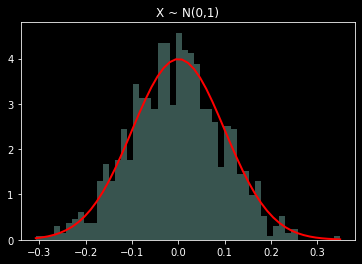

In [24]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import colors
plt.style.use('dark_background')


mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 50, density=True,alpha=.40)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title('X ~ N(0,1)')
plt.show()

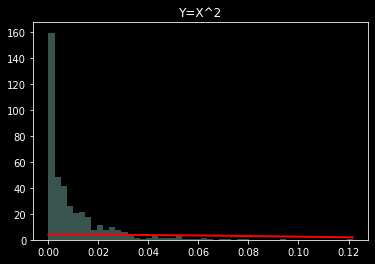

In [25]:
count, bins, ignored = plt.hist(s**2, 50, density=True,alpha=.40)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title('Y=X^2')
plt.show()

Text(0.5, 1.0, 'X vs. Y=X^2')

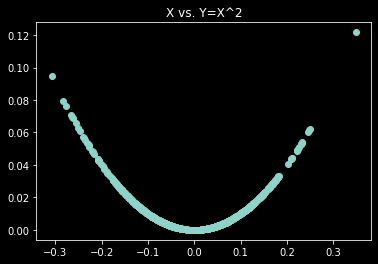

In [34]:
plt.scatter(s,s**2)
plt.title('X vs. Y=X^2')

In [40]:
print(f'The correlation coefficient is {round(float(np.correlate(s,s**2)),4)} .')

The correlation coefficient is -0.1925 .


## Covariance and Variance

## Properties of Covariance

## Correlation: Location and Space-Invariant

## Transformations

- Single Variable

- Two Variables


## Convolutions

## Convolution Integral

## Relevance to "Convolutional" Neural Networks

# Poisson Processes

# Law of Large Numbers

# Central Limit Theorem

# Markov Chains

### Markov Property

### States

### Transition Matrix

### Chain Properties

### Stationary DIstributions

# Some Continuous Distribitions

## Normal

## Exponential

## Gamma

## Beta

## Chi-Square

# Some Discrete Distribitions

## Sampling: Varying Number of Trials and Replacement

## Bernoulli

## Binomial

## Geometric

## First-Success

## Negative Binomial

## Hypergeometric

## Poisson

# Some Multivariate Distributions

## Multinomial

## Multivariate Uniform

## Multivariate Normal

## A Note on Mixture Models

### EM and Mixture Models

# In Case You Missed It: Special Cases of Distributions

- 

# Important Inequalities

## Cauchy-Shwarz

## Markov

## Chebyshev

## Jensen

# Background: Formulas

## Geometric Series

## Exponential Function

## Gamma and Beta Integrals

## Euler's Approximation for a Harmonic Sum

## Stirling's Approximation for Factorials